# P3 


This project gives you experience with getting data from the web. 



In [1]:
import pandas as pd 
import numpy as np
from bs4 import BeautifulSoup
import requests 
import re
import os
import datetime
import json
from io import StringIO

from getpass import getpass

import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

import otter
grader = otter.Notebook()

if re.search(r'amzn', os.uname().release):
    GS = True
else:
    GS = False

**NOTE** A note on grading for this project.  
Each question has the total points listed which will be split between autograding methods and manual grading; make sure you review your code to achieve the requested result.   

## Q1 - (6 pts total)

Scrape [https://www.data.gov](https://www.data.gov) to identify and print out the number of data sets available.

In [2]:
site = requests.get('https://www.data.gov').text
q1 = BeautifulSoup(site, 'html5lib')

In [3]:
q1_num_datasets =  int(q1.find('span',"text-color-red").text.replace(',', ''))   # q1_num_datasets should be an integer  
print("The number of datasets is ", str(q1_num_datasets))

The number of datasets is  259718


In [4]:
grader.check("q1")

q1 results: All test cases passed!

## Q2 - (30 pts total) 

From the list of top 200 most popular names for babies born in the US in the 2010s.  We are interested in the names that start with 'C' or contain a letter  'X' or 'x'.  

Create a DataFrame with the names that start with 'X' or contain a letter  'X' or 'x' (for both male and female together), their rank, and the number of times the name is used.  DataFrame has four columns: "Rank" - int, "Names" - str, "Number" - int, and "Gender" - str - "Male"/"Female". 

Examples names from the table are: 
* 8, Alexander, 142043
* 9, Charlotte, 102409
* 15, Chloe, 85235
* 27, Christopher, 102040
* ... 

Display the first 10 rows of the DataFrame, sorted by decreasing number.  Also, print out the sum of the number of the 'X' names and the sum of the number of names with 'X' or 'x'.  

Data available at: https://www.ssa.gov/OACT/babynames/decades/names2010s.html

In [5]:
site = requests.get('https://www.ssa.gov/OACT/babynames/decades/names2010s.html').text
q2 = BeautifulSoup(site, 'html5lib')

In [6]:
# Get the table 
table = q2.find('table', "t-stripe")
header = []
rows = []
for i, row in enumerate(table.find_all('tr')):
    if i == 0:
        header = [element.text.strip() for element in row.find_all('th')]
    else:
        rows.append([element.text.strip() for element in row.find_all('td')])
rows = rows[1:201]
# convert the rows list into dataframe with required coloumn
names = pd.DataFrame(rows, columns = ['Rank', 'Name_Male', 'Number_Male', 'Name_Female', 'Number_Female'])

# For combining the male and female names and numbers 
Rank = names['Rank'].tolist()
Names_Male = names['Name_Male'].tolist()
Number_Male = names['Number_Male'].tolist()
Names_Female = names['Name_Female'].tolist()
Number_Female = names['Number_Female'].tolist()

# Adding the ranks, names, numbers to make final dataframe
Rank = Rank + Rank
names = Names_Male + Names_Female
numbers = Number_Male + Number_Female
# For creating a gender column 
genders = ['Male'] * len(Number_Male) + ['Female'] * len(Names_Female)


In [7]:
# Create a DataFrame 'names' for the names that start with C or have a X/x
# The 'names' DataFrame has four colummns: 
#   'Rank' (int) 
#   'Name' (str)
#   'Num' (int) 
#   'Gender' (str) 'Female' / 'Male'

names = pd.DataFrame({'Rank':Rank,'Name': names, 'Num' : numbers,'Gender' : genders})
names = names[names['Name'].str.contains('C|^X|x')]
names['Rank'] = names['Rank'].astype(int)
names['Name'] = names['Name'].astype(str)
names['Num'] = names['Num'].astype(str).str.replace(',', '').astype(int)
names['Gender'] = names['Gender'].astype(str)

numCnames = names[names['Name'].str.startswith('C')]['Num'].sum()  # the sum of the names beginning with C 
numXnames = names[names['Name'].str.contains('^X|x')]['Num'].sum()   # the sum of the names with a X/x


print("Total number of names that start with C  : " + str(numCnames))
print("Total number of names that contain X/x   : " + str(numXnames))

names.head(10)

Total number of names that start with C  : 1390108
Total number of names that contain X/x   : 642599


,Rank,Name,Num,Gender
7,8,Alexander,142043,Male
26,27,Christopher,102040,Male
29,30,Carter,95188,Male
37,38,Caleb,86661,Male
40,41,Christian,84097,Male
49,50,Charles,69958,Male
51,52,Jaxon,69103,Male
52,53,Connor,68243,Male
56,57,Cameron,66156,Male
67,68,Colton,58416,Male


In [8]:
grader.check("q2")

q2 results: All test cases passed!

## Q3 - (24 pts total) 

Use Python to scrape the articles posted to https://techcrunch.com/  front page under "The Latest", and report this in a DataFrame.  

The columns of the DataFrame `news` should be:

* 'Title' - article title, type `object` *string*
* 'Date' - publish date, type `datetime64[ns, tz]` _will have to convert to this type_
* 'Author' - author, type `object` *string*

Note: be respectful to the website (obey robots.txt information) and do not repeatedly access the site.


In [9]:
html = requests.get("https://techcrunch.com").text
soup = BeautifulSoup(html, 'html5lib')

In [10]:
# Pull information from website into DataFrame 'news'
#  'news' has columns: 
#     - 'Title', str 
#     - 'Date', datetime object 
#     - 'Author', str 

# Get the article 
articles = soup.select('.post-block')
Articles = []
# Get the title, date, author from the article
for article in articles:
    Title = article.select_one('.post-block__title__link').text.strip()
    Date = article.select_one('time')['datetime']
    Author = article.select_one('.river-byline__authors a').text.strip()

    Articles.append({'Title': Title, 'Date': Date, 'Author': Author})


news = pd.DataFrame(Articles)
news['Date'] = pd.to_datetime(news['Date'])

news.head()

,Title,Date,Author
0,Microsoft launches a deepfakes creator at Igni...,2023-11-15 15:30:19-08:00,Kyle Wiggers
1,Microsoft renames Bing Chat to Copilot as it c...,2023-11-15 15:20:47-08:00,Kyle Wiggers
2,Microsoft Teams gets an AI-powered home decora...,2023-11-15 15:10:58-08:00,Frederic Lardinois
3,Threads starts testing hashtags…without the hash,2023-11-15 14:55:02-08:00,Sarah Perez
4,"Microsoft combines Microsoft To Do, Planner an...",2023-11-15 14:50:04-08:00,Frederic Lardinois


In [11]:
grader.check("q3")

q3 results: All test cases passed!

## Q4 

For this problem, you will be getting data from an API.  We will be getting information from NASA about Near Earth Objects (NEOs).  

First, you will need to get an API key to use the system.  You can get one at https://api.nasa.gov/. You’ll need to supply an email address, which can
be either your MTU email or a personal email address.

Be aware of the limitation on the requests per day from a given IP. 

Do not repeatedly hit the system for requests or you will shut down your access for the rest of the day. 

**Asteroids NeoWs API** 

We will be using the Asteroids NeoWs API.  You can find information on this API under the "Browse APIs" part of the website. 

We will use the "feed" endpoint to retrieve Near Earth Objects based on the
date of their closest approach to Earth. This endpoint takes three parameters: 
`start_date`, `end_date` and `api_key`. 





### Q4a - (8 pts total)

You will construct the request string to retrieve the Near Earth Objects for January 1, 2021.  

From the response, report the number of NEOs - `num_NEOs`. 

In [12]:
if GS==False:
    keys = {}
    keys['NASA_KEY'] = getpass("Enter Kaggle API Key: ")

Enter Kaggle API Key:  ········································


In [13]:
q4site = 'https://api.nasa.gov/neo/rest/v1/feed'
q4a_start_date = '2021-01-01'
q4a_end_date = '2021-01-01'
q4a_api_key = keys['NASA_KEY']

q4a_params = { 'start_date': q4a_start_date, 'end_date': q4a_end_date, 'api_key': q4a_api_key }

q4a_resp = requests.get(q4site, q4a_params)

NEO_data =  q4a_resp.json()

num_NEOs = NEO_data['element_count']


In [14]:
grader.check("q4a")

q4a results: All test cases passed!

### Q4b - (12 pts total)

You are writing a function to get all the Near Earth Objects for a particular day from the API.  

The function `get_neos_response` has 4 inputs: 

* `key` - string, API Key 
* `year` - integer 
* `month` - integer, optional defaults to 1
* `day` - integer, optional defaults to 1

The function returns the JSON object from the NeoWs endpoint for the specified day. 

*Assumptions*   
You may assume the `year`, `month`, `day` arguments are positive integers and that when formatted as `yyyy-mm-dd` specify a valid date. 

You make make use of any of the libraries imported at the top of the notebook, e.g., `datetime`, but may not import other libraries. 

*Suggestions*  
Break into steps: 

1. Use the supplied date informaiton to construct the `start_date` and `end_date` strings needed for the API request. 

2. Use the `start_date` and `end_date` along with the API key to create a dictionary of parameters, `q4b_params`, and use `requests` to submit a HTTP GET request to the NASA API. 

3. Extract the JSON object in the resulting `requests` object and return it as a dictionary. 



In [15]:
# Function get_neos_response
# Inputs: 
#  key - string, API key
#  year - integer, required 
#  month - integer, optional default to 1
#  day - integer, optional default to 1
# Returns: 
#  JSON object that is returned by NASA NeoWs end point for specified day 

def get_neos_response(key, year, month =1, day = 1): 

    q4b_start_date = f"{year}-{month:02d}-{day:02d}"
  
    q4b_end_date = f"{year}-{month:02d}-{day:02d}"
    
    q4a_api_key = keys['NASA_KEY']
    
    q4b_params = { 'start_date': q4b_start_date, 'end_date': q4b_end_date, 'api_key': q4a_api_key }
    
    q4b_resp = requests.get('https://api.nasa.gov/neo/rest/v1/feed', q4b_params)
    
    NEO_data = q4b_resp.json()
    
    return NEO_data


q4b_test1 = get_neos_response(keys['NASA_KEY'], 2022)
q4b_test2 = get_neos_response(keys['NASA_KEY'], 1986, 2, 9)
q4b_test3 = get_neos_response(keys['NASA_KEY'], 1958, 12)
q4b_test4 = get_neos_response(keys['NASA_KEY'], 2021)
q4b_test5 = get_neos_response(keys['NASA_KEY'], 2015, 1, 1)

In [16]:
grader.check("q4b")

q4b results: All test cases passed!

### Q4c - (12 pts total)

Now you will be asked to write a function `is_valid_date` that takes three input: 

* `year`, integer
* `month`, integer 
* `day`, integer 

and returns a Boolean that is true if and only if the arguments are for a valid date. 


Examples of valid dates are: 
 
 * 2021-10-31
 * 1934-02-20
 * 1968-07-30
 
Examples of invalid dates are: 

 * 2020-13-01 *no 13th month*
 * 2004-04-34 *no 34th day* 
 * 1988-00-04 *no 0th month* 
 * 1997-02-29 *no leap day* 
 
Accounting for [leap years](https://en.wikipedia.org/wiki/Leap_year) is more challenging.  Leap years (in the Gregorian calendar) are those that are divisible by 4, but not by 100, except if they are divisible by 400.  


In [17]:
# Function is_valid_date
# Inputs: 
#  year - integer
#  month - integer
#  day - integer
# Returns: 
#  Boolean - true if and only if the arguments are for a valid date  

def is_valid_date(year, month, day): 
    # check for year, month, day validity 
    if year > 0 and 1 <= month <= 12 and 1<= day <=31:
        # check for leap year
        if month == 2:
            if (day == 29 and ((year % 4 == 0 and year % 100 != 0) or (year % 400 == 0))):
                return True
            elif 1 <= day <= 28:
                return True
        # check odd months 
        elif month in [1, 3, 5, 7, 8, 10, 12] and 1 <= day <= 31:
            return True
        # check even months 
        elif month in [4, 6, 9, 11] and 1 <= day <= 30:
            return True
    return False


q4c_test1 = is_valid_date(2023, 11, 9)
q4c_test2 = is_valid_date(2020, 10, 32)
q4c_test3 = is_valid_date(2020, 0, 1)
q4c_test4 = is_valid_date(2023, 2, 29)
q4c_test5 = is_valid_date(2016, 2, 29)
q4c_test6 = is_valid_date(1990, 2, 29)
q4c_test7 = is_valid_date(2020, 2, 29)

In [18]:
grader.check("q4c")

q4c results: All test cases passed!

### Q4d - (22 pts total)

Now you will write a function `get_neos_data` that takes the same arguments as `get_neos_response`, but now returns a DataFrame with some of the Near Earth Objects information. 

The function `get_neos_data` has 4 inputs:

* `key` - string, API Key
* `year` - integer
* `month` - integer, optional defaults to 1
* `day` - integer, optional defaults to 1

You should check that the arguments are of the appropriate type and are all positive, if not return None. Additionally, if the arguments do not specify a valid date, return None. 

Use the `get_neos_response` function to get the JSON object for the date from NASA. 

Extract the following information into a DataFrame for the Near Earth Objects and return that DataFrame: 

* `id` the "id" of the NEO 
* `name` the "name" of the NEO 
* `minDim` the "minimal diameter" of the NEO in kilometers  (float)
* `maxDim` the "maximal diameter" of the NEO in kilometers  (float)
* `missDist` the "miss distance" of the NEO in kilometers  (float)
* `orbitBody` the "orbiting body" of the NEO
* `hazard` if the NEO "is potentially hazardous" 




In [19]:
# Function get_neos_data
# Inputs: 
#  key - string, API key
#  year - integer, required 
#  month - integer, optional default to 1
#  day - integer, optional default to 1
# Returns: 
#  JSON object that is returned by NASA NeoWs end point for specified day 

def get_neos_data(key, year, month=1, day=1): 

    # Check inputs using the is_valid_date function 
    if (is_valid_date(year, month, day) == False):
        
        return None
    
    
    # Get JSON Object with get_neos_response
    
    def get_neos_response(key, year, month =1, day = 1): 

        q4b_start_date = f"{year}-{month:02d}-{day:02d}"

        q4b_end_date = f"{year}-{month:02d}-{day:02d}"

        q4a_api_key = keys['NASA_KEY']

        q4b_params = { 'start_date': q4b_start_date, 'end_date': q4b_end_date, 'api_key': q4a_api_key }

        q4b_resp = requests.get('https://api.nasa.gov/neo/rest/v1/feed', q4b_params)

        NEO_data = q4b_resp.json()

        return NEO_data

    # store the data NEO_Data
    NEO_Data = get_neos_response(key, year, month, day)

    # Get all the required data into DataFrame 
    neo_data = []
    for data in NEO_Data['near_earth_objects']:
        for neo in NEO_Data['near_earth_objects'][data]:
            neo_data.append({
                'id': neo['id'],
                'name': neo['name'],
                'minDim': neo['estimated_diameter']['kilometers']['estimated_diameter_min'],
                'maxDim': neo['estimated_diameter']['kilometers']['estimated_diameter_max'],
                'missDist': neo['close_approach_data'][0]['miss_distance']['kilometers'],
                'orbitBody': neo['close_approach_data'][0]['orbiting_body'],
                'hazard': neo['is_potentially_hazardous_asteroid']
            })
        
    # Convert the data into dataframe 
    neos_df = pd.DataFrame(neo_data)
    neos_df['missDist'] = neos_df['missDist'].astype(float)
    
    return neos_df
 



q4d_df1 = get_neos_data(keys['NASA_KEY'], 2022)
q4d_df2 = get_neos_data(keys['NASA_KEY'], 1986, 2, 9)
q4d_df3 = get_neos_data(keys['NASA_KEY'], 1958, 12)
q4d_df4 = get_neos_data(keys['NASA_KEY'], 2021)
q4d_df5 = get_neos_data(keys['NASA_KEY'], 2015, 1, 40)
q4d_df1.head()


,id,name,minDim,maxDim,missDist,orbitBody,hazard
0,2363505,363505 (2003 UC20),0.530341,1.185878,2.359123e+07,Earth,True
1,2376848,376848 (2001 RY47),0.318094,0.711279,5.117541e+07,Earth,False
2,2488490,488490 (2000 AF205),0.110804,0.247765,6.091417e+07,Earth,True
3,3388081,(2007 TL23),0.134448,0.300635,2.957283e+07,Earth,True
4,3592308,(2012 AP10),0.013322,0.029788,5.940803e+07,Earth,False


In [20]:
#del keys  # remove api key from being saved 

In [21]:
grader.check("q4d")

q4d results: All test cases passed!

<!-- BEGIN QUESTION -->

## Bonus - (4 points) 

Going back to the names data from Q3.  Let's look at how the distribution of popular names has changed over time. 

Create a small multiples plot (meaning each plot is the same type and showing similar information in a grid).  

The small multiples plot will show how the distribution of names has changed from the 1960s to 2010s.  

1960s data - https://www.ssa.gov/OACT/babynames/decades/names1960s.html  
1970s data - https://www.ssa.gov/OACT/babynames/decades/names1970s.html  
...  
2010s data - https://www.ssa.gov/OACT/babynames/decades/names2010s.html

Let's focus on just how the distribution of girls names have changed.  This can be displayed using a line plot on just the top 100 names per decade.

When getting the information, you should also scrape the total number of female births in that period to normalize the number of names as a percent in that decade. 


Your final grid should display: 

|         | Col 1 | Col 2 | 
|-------|-----------|-----------|
| Row 1 | 1960 plot | 1970 plot | 
| Row 2 | 1980 plot | 1990 plot | 
| Row 3 | 2000 plot | 2010 plot | 



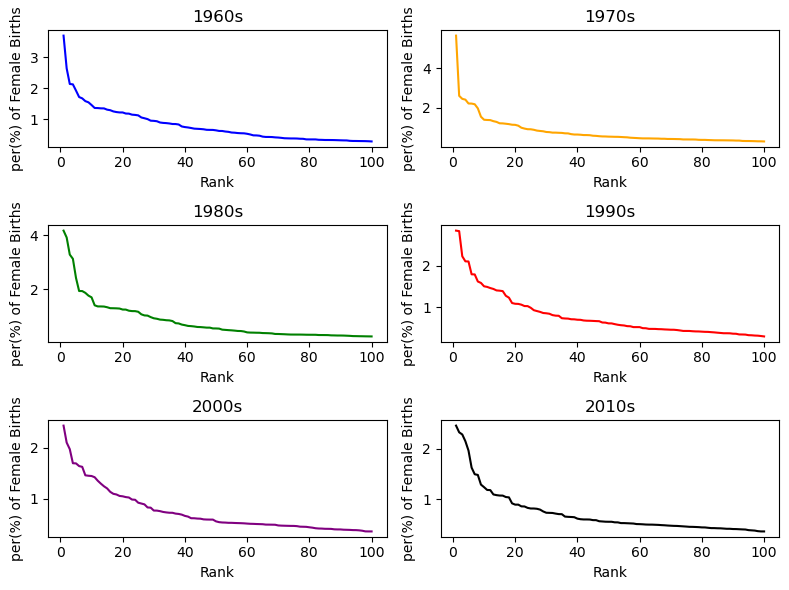

In [22]:
# Create small multiples plot. 

# To Get the data using same approach in the Q3
def get_decade_data(decade):
    site = requests.get(f'https://www.ssa.gov/OACT/babynames/decades/names{decade}s.html').text
    soup = BeautifulSoup(site, 'html5lib')
    table = soup.find('table', "t-stripe")

    header = []
    rows = []

    for i, row in enumerate(table.find_all('tr')):
        if i == 0:
            header = [element.text.strip() for element in row.find_all('th')]
        else:
            rows.append([element.text.strip() for element in row.find_all('td')])

    rows = rows[1:201]  
    # Make the dataframe from the list 
    names = pd.DataFrame(rows, columns = ['Rank', 'Name_Male', 'Number_Male', 'Name_Female', 'Number_Female'])

    # Convert the columns into list for concating the males and females 
    Rank = names['Rank'].tolist()
    Names_Male = names['Name_Male'].tolist()
    Number_Male = names['Number_Male'].tolist()
    Names_Female = names['Name_Female'].tolist()
    Number_Female = names['Number_Female'].tolist()

    # Add the Male and Female name, rank, numbers 
    Rank = Rank + Rank
    names = Names_Male + Names_Female
    numbers = Number_Male + Number_Female
    genders = ['Male'] * len(Names_Male) + ['Female'] * len(Names_Female)

    # Convert it into dataframe 
    names = pd.DataFrame({'Rank':Rank,'Name': names, 'Num' : numbers,'Gender' : genders})


    names['Rank'] = names['Rank'].astype(int)
    names['Name'] = names['Name'].astype(str)
    names['Num'] = names['Num'].astype(str).str.replace(',', '').astype(int)
    names['Gender'] = names['Gender'].astype(str)
    
    # Keep only Female data in the dataframe 
    names = names[names['Gender'] == 'Female'].reset_index()
    
    # Calculate the total female births 
    total_female_births = names['Num'].sum()

    return names, total_female_births


# To create line plot for a decade
def create_line_plot(ax, names_df, total_female_births, decade, color):
    
    # Calculate the percentage of each name
    names_df['Percentage'] = (names_df['Num'] / total_female_births) * 100

    # only the top 100 names
    top_100_names = names_df.head(100)

    # To create a line plot
    ax.plot(top_100_names['Rank'], top_100_names['Percentage'], label=f'{decade}s', color = color)
    ax.set_title(f'{decade}s')
    ax.set_xlabel('Rank')
    ax.set_ylabel('per(%) of Female Births')
  
# Create small multiples plot
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8, 6))

# For different colors for plot for good visualization
colors = ['blue', 'orange', 'green', 'red', 'purple', 'black']

# Get the data for each decades
for i, decade in enumerate(range(1960, 2020, 10)):
    # Get the data 
    names_df, total_female_births = get_decade_data(decade)
    # For the subplots
    row = i // 2
    col = i % 2
    # Create line plot for the decade
    create_line_plot(axes[row, col], names_df, total_female_births, decade,colors[i])
    

plt.tight_layout()
plt.show()





<!-- END QUESTION -->



## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [24]:
# Save your notebook first, then run this cell to export your submission.
grader.export(pdf=False)